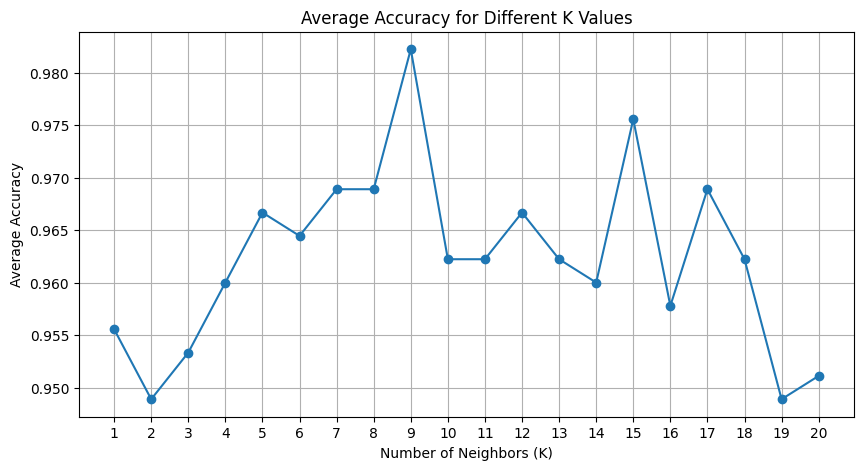

Best K: 9


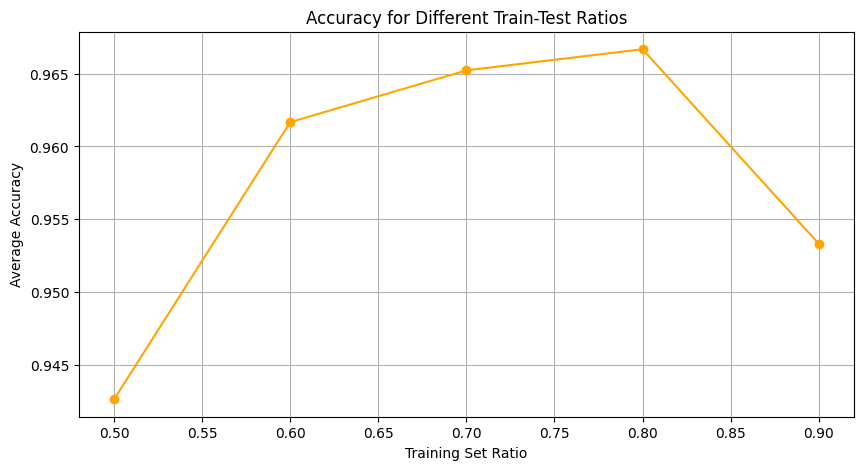

Best Training Set Ratio: 0.8


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=['SL', 'SW', 'PL', 'PW'])
labels = iris.target

# Function to find the best K by calculating average performance
def find_best_k(data, labels, max_k=20, test_size=0.3):
    """Finds the best K for KNN by calculating average performance."""
    avg_accuracies = []

    for k in range(1, max_k + 1):
        accuracies = []
        for _ in range(10):  # Repeat multiple times for stability
            X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=None)
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
        avg_accuracies.append(np.mean(accuracies))

    best_k = np.argmax(avg_accuracies) + 1
    return best_k, avg_accuracies

# Function to experiment with different train-test ratios
def find_best_train_test_ratio(data, labels, ratios, k=3):
    """Finds the best train-test split ratio."""
    ratio_accuracies = []

    for ratio in ratios:
        accuracies = []
        for _ in range(10):  # Repeat multiple times for stability
            test_size = 1 - ratio
            X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=None)
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracies.append(accuracy_score(y_test, y_pred))
        ratio_accuracies.append(np.mean(accuracies))

    best_ratio = ratios[np.argmax(ratio_accuracies)]
    return best_ratio, ratio_accuracies

# Task 1: Find the best K
best_k, avg_accuracies = find_best_k(data, labels)

# Plot K vs Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(avg_accuracies) + 1), avg_accuracies, marker='o')
plt.title('Average Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Accuracy')
plt.xticks(range(1, len(avg_accuracies) + 1))
plt.grid()
plt.show()
print(f"Best K: {best_k}")

# Task 2: Find the best train-test split ratio
ratios = np.linspace(0.5, 0.9, 5)  # Experiment with ratios from 50% to 90% training data
best_ratio, ratio_accuracies = find_best_train_test_ratio(data, labels, ratios, k=best_k)

# Plot Train-Test Ratio vs Accuracy
plt.figure(figsize=(10, 5))
plt.plot(ratios, ratio_accuracies, marker='o', color='orange')
plt.title('Accuracy for Different Train-Test Ratios')
plt.xlabel('Training Set Ratio')
plt.ylabel('Average Accuracy')
plt.grid()
plt.show()
print(f"Best Training Set Ratio: {best_ratio}")
